### Steps of the algorithm

For each of point to be predicted:
* Calculate the (Euclidean) distance between the point and every point in the training set
* Sort distances from lowest to highest and pick $k$ lowest values
* Calculate average target value for $k$ selected points
* Assign to the point value from previous step

In [1]:
import numpy as np

In [3]:
# Define distance function
def distance(X, x):
  '''
  Calculates the Euclidean distance between X and x

  Args:
    X (n, d) array of n points in d dimensional space (training set)
    x (d, ) point to be predicted

  Returns
    distances (n, 1) array of distances between i-th point and point to be predicted
  '''
  return np.sum((X - x)**2, axis = 1)**(1/2)

In [4]:
def find_k_closest(X, x, k):
  '''
  Finds k closest point to x

    Args:
      X (n, d) array of n points in d dimensional space (training set)
      x (d, ) point to be predicted
      k int, number of closest points

      Returns
    (indices, min_distances) , where: indices is the list of indices of k points closest to x and min_distances contains distances of k closest points to x
  '''
  distances = distance(X, x)
  indices = np.argpartition(distances, k)[:k]
  min_distances = distances[indices] # Select only k closest points

  return (indices, min_distances)

In [5]:
def predict(X, y, x, k):
  '''
  Predicts x

    Args:
      X (n, d) array of n points in d dimensional space (training set)
      y (n, ) array of targets
      x (d, ) point to be predicted
      k int, number of closest points

    Returns:
      value (float) predicted value of x
  '''
  (indices, min_distances) = find_k_closest(X, x, k)
  targets = y[indices] # pick appropriate targets from y

  return np.mean(targets)


### Testing the algorithm

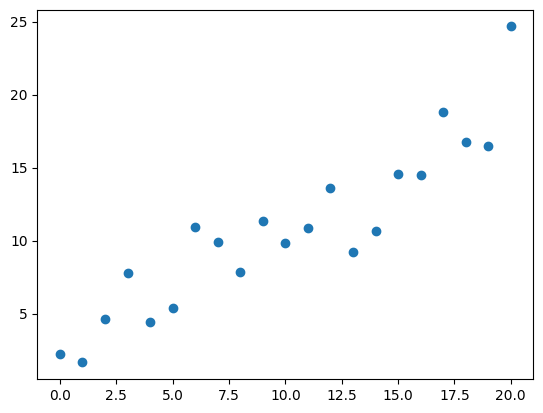

In [6]:
# Create and plot test set

import matplotlib.pyplot as plt

np.random.seed(42)

X = np.expand_dims(np.arange(0, 21), axis = 1)
y = X + np.random.normal(loc = 1, scale = 2.5, size = X.shape)

plt.scatter(X, y)
plt.show()

In [9]:
# Calculate and plot predictions for k = 5
predictions = [predict(X, y, x, 5) for x in list(X.flatten())]
predictions

[4.147507435812715,
 4.147507435812715,
 4.147507435812715,
 4.782081880832508,
 6.6408204391717955,
 7.700693534697905,
 7.704441413526416,
 9.092798122681065,
 9.978157754749423,
 9.955686470210603,
 10.692950241417163,
 10.97104731205574,
 10.837308374006241,
 11.787873455791987,
 12.514322772409903,
 13.550465302924522,
 15.053093387492813,
 16.209400453081688,
 18.223368602162953,
 18.22336860216295,
 18.22336860216295]

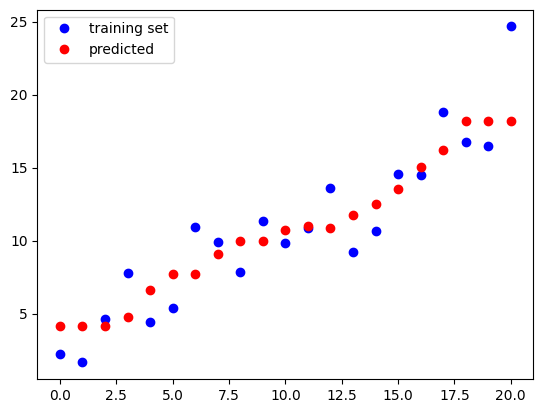

In [10]:
# Plot train set and predictions
plt.plot(X, y, 'ob', label = 'training set')
plt.plot(X, predictions, 'or', label = 'predicted')
plt.legend()
plt.show()